In [56]:
from sklearn.datasets import load_breast_cancer

bc = load_breast_cancer()

In [57]:
print(bc.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

# dataset info

In [58]:
bc.target[500]

np.int64(1)

In [59]:
bc.target.shape 

(569,)

In [60]:
bc.data[500]

array([1.504e+01, 1.674e+01, 9.873e+01, 6.894e+02, 9.883e-02, 1.364e-01,
       7.721e-02, 6.142e-02, 1.668e-01, 6.869e-02, 3.720e-01, 8.423e-01,
       2.304e+00, 3.484e+01, 4.123e-03, 1.819e-02, 1.996e-02, 1.004e-02,
       1.055e-02, 3.237e-03, 1.676e+01, 2.043e+01, 1.097e+02, 8.569e+02,
       1.135e-01, 2.176e-01, 1.856e-01, 1.018e-01, 2.177e-01, 8.549e-02])

In [61]:
bc.data.shape

(569, 30)

# Preprocessing

In [62]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(bc.data, bc.target, test_size=0.2)

In [63]:
print(f"Feature=> train: {x_train.shape} - test: {x_test.shape}")
print(f"Label=> train: {y_train.shape} - test: {y_test.shape}")

Feature=> train: (455, 30) - test: (114, 30)
Label=> train: (455,) - test: (114,)


In [64]:
x_train[0]

array([9.738e+00, 1.197e+01, 6.124e+01, 2.885e+02, 9.250e-02, 4.102e-02,
       0.000e+00, 0.000e+00, 1.903e-01, 6.422e-02, 1.988e-01, 4.960e-01,
       1.218e+00, 1.226e+01, 6.040e-03, 5.656e-03, 0.000e+00, 0.000e+00,
       2.277e-02, 3.220e-03, 1.062e+01, 1.410e+01, 6.653e+01, 3.429e+02,
       1.234e-01, 7.204e-02, 0.000e+00, 0.000e+00, 3.105e-01, 8.151e-02])

In [65]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [66]:
x_train[0]

array([0.13488918, 0.07642881, 0.12193418, 0.06150583, 0.359935  ,
       0.0663763 , 0.        , 0.        , 0.42575758, 0.2960373 ,
       0.0358448 , 0.02945469, 0.02497958, 0.0094061 , 0.14709182,
       0.02556554, 0.        , 0.        , 0.2094895 , 0.08033111,
       0.09569548, 0.0554371 , 0.08028288, 0.03875836, 0.34491184,
       0.04341667, 0.        , 0.        , 0.30356791, 0.17361931])

# classification

In [67]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

def calculate_metrics(y_train, y_test, y_pred_train, y_pred_test):
    acc_train = accuracy_score(y_true=y_train, y_pred=y_pred_train)
    acc_test = accuracy_score(y_true=y_test, y_pred=y_pred_test)
    
    p = accuracy_score(y_true=y_train, y_pred=y_pred_train)
    r = recall_score(y_true=y_test, y_pred=y_pred_test)
    
    print(f"acc_train: {acc_train} - acc_test: {acc_test} - precision: {p} - recall: {r}")
    
    return acc_train, acc_test, p, r

# 1. Naive bayes

In [68]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(x_train, y_train)

GaussianNB()

In [69]:
y_pred_train = gnb.predict(x_train)
y_pred_test = gnb.predict(x_test)

acc_train_gnb, acc_test_gnb, p_gnb, r_gnb = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc_train: 0.9384615384615385 - acc_test: 0.9473684210526315 - precision: 0.9384615384615385 - recall: 0.9583333333333334


# 2. KNN

In [70]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=8, algorithm='kd_tree', leaf_size=28)
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=28, n_neighbors=8)

In [71]:
y_pred_train = knn.predict(x_train)
y_pred_test = knn.predict(x_test)

acc_train_knn, acc_test_knn, p_knn, r_knn = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc_train: 0.9758241758241758 - acc_test: 0.9473684210526315 - precision: 0.9758241758241758 - recall: 0.9444444444444444


# 3. decision tree

In [72]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=128, min_samples_split=6, criterion='gini')
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=128, min_samples_split=6)

In [73]:
y_pred_train = dt.predict(x_train)
y_pred_test = dt.predict(x_test)

acc_train_dt, acc_test_dt, p_dt, r_dt = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc_train: 0.9978021978021978 - acc_test: 0.9122807017543859 - precision: 0.9978021978021978 - recall: 0.9027777777777778


# 4. Random Forest

In [74]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=500, max_depth=64, min_samples_split=8)
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=64, min_samples_split=8, n_estimators=500)

In [75]:
y_pred_train = rf.predict(x_train)
y_pred_test = rf.predict(x_test)

acc_train_rf, acc_test_rf, p_rf, r_rf = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc_train: 0.9956043956043956 - acc_test: 0.9649122807017544 - precision: 0.9956043956043956 - recall: 0.9722222222222222


# 5. SVM

In [76]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(x_train, y_train)

SVC()

In [77]:
y_pred_train = svm.predict(x_train)
y_pred_test = svm.predict(x_test)

acc_train_svm, acc_test_svm, p_svm, r_svm = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc_train: 0.9846153846153847 - acc_test: 0.9649122807017544 - precision: 0.9846153846153847 - recall: 0.9722222222222222


# 6. Logistic Regression

In [78]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [79]:
y_pred_train = lr.predict(x_train)
y_pred_test = lr.predict(x_test)

acc_train_lr, acc_test_lr, p_lr, r_lr = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc_train: 0.9802197802197802 - acc_test: 0.956140350877193 - precision: 0.9802197802197802 - recall: 0.9722222222222222


# 7. ANN

In [80]:
from sklearn.neural_network import MLPClassifier

ann = MLPClassifier(hidden_layer_sizes=512, activation='relu', solver='adam')
ann.fit(x_train, y_train)

c:\Users\Admin-IT\Desktop\ML\learning_venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=512)

In [81]:
y_pred_train = ann.predict(x_train)
y_pred_test = ann.predict(x_test)

acc_train_ann, acc_test_ann, p_ann, r_ann = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc_train: 0.9846153846153847 - acc_test: 0.9736842105263158 - precision: 0.9846153846153847 - recall: 0.9722222222222222


# Comparison

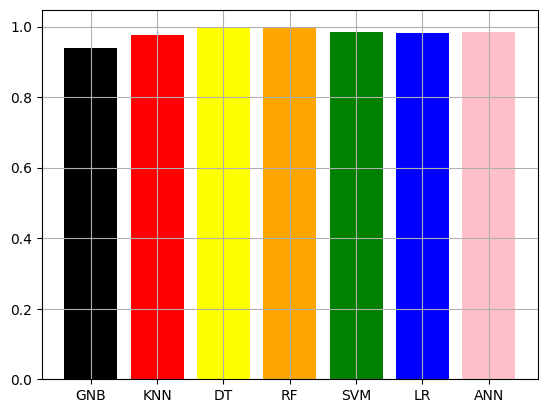

In [83]:
import matplotlib.pyplot as plt 

acc_train = [acc_train_gnb, acc_train_knn, acc_train_dt, acc_train_rf, acc_train_svm, acc_train_lr, acc_train_ann]
title = ["GNB", "KNN", "DT", "RF", "SVM", "LR", "ANN"]

colors = ['black', 'red', 'yellow', 'orange', 'green', 'blue', 'pink']
plt.bar(title, acc_train, color=colors)
plt.grid()
plt.show()

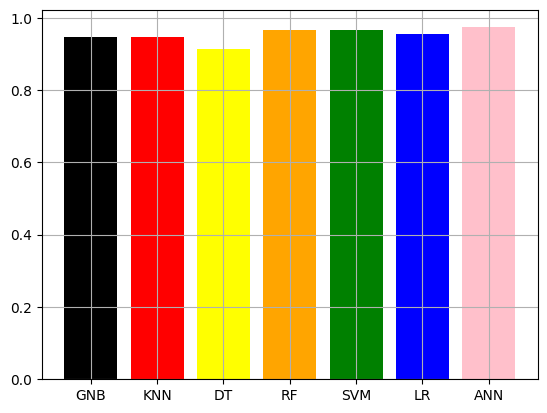

In [84]:
acc_test = [acc_test_gnb, acc_test_knn, acc_test_dt, acc_test_rf, acc_test_svm, acc_test_lr, acc_test_ann]
title = ["GNB", "KNN", "DT", "RF", "SVM", "LR", "ANN"]

colors = ['black', 'red', 'yellow', 'orange', 'green', 'blue', 'pink']
plt.bar(title, acc_test, color=colors)
plt.grid()
plt.show()

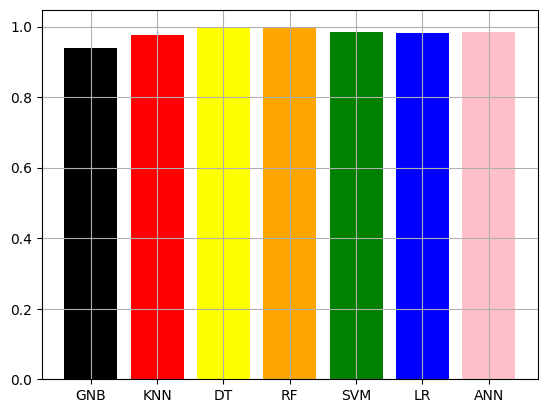

In [85]:
p = [p_gnb, p_knn, p_dt, p_rf, p_svm, p_lr, p_ann]
title = ["GNB", "KNN", "DT", "RF", "SVM", "LR", "ANN"]

colors = ['black', 'red', 'yellow', 'orange', 'green', 'blue', 'pink']
plt.bar(title, p, color=colors)
plt.grid()
plt.show()

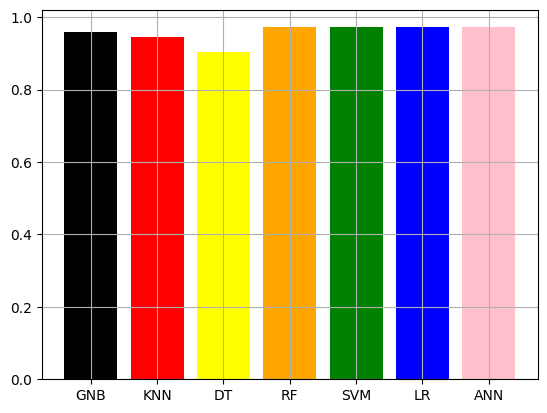

In [86]:
r = [r_gnb, r_knn, r_dt, r_rf, r_svm, r_lr, r_ann]
title = ["GNB", "KNN", "DT", "RF", "SVM", "LR", "ANN"]

colors = ['black', 'red', 'yellow', 'orange', 'green', 'blue', 'pink']
plt.bar(title, r, color=colors)
plt.grid()
plt.show()